In [1]:
import pandas as pd

df = pd.read_csv('../data/data_nlp_A.csv', parse_dates=['last_publish_date', 'date_min'])

In [2]:
num_bl = ['word_count', 'h1_len', 'abstract_len', 
          #'likes_n_days', 'dislikes_n_days', 'video_play', 
          'mean_version_lifetime']
cat_bl = ['classification_product', 'classification_type', 'media_type', #'sentiment_abstract', 'sentiment_meta_title'
          ]
target = 'ctr'

data = df[num_bl + cat_bl + [target]]

In [3]:
from pycaret.regression import *

s = setup(data, target=target, session_id=42, transform_target=True, 
          transform_target_method='yeo-johnson', transformation=True
          ) #‘yeo-johnson’ in fact lol

,Description,Value
0,Session id,42
1,Target,ctr
2,Target type,Regression
3,Original data shape,"(6815, 8)"
4,Transformed data shape,"(6815, 32)"
5,Transformed train set shape,"(4770, 32)"
6,Transformed test set shape,"(2045, 32)"
7,Numeric features,4
8,Categorical features,3
9,Rows with missing values,0.1%


In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.4122,12.8136,3.5669,0.1272,0.3809,0.3812,0.1250
lightgbm,Light Gradient Boosting Machine,2.4434,12.8984,3.5771,0.1238,0.3850,0.3859,0.3260
rf,Random Forest Regressor,2.4816,13.1683,3.6166,0.1022,0.3915,0.3945,0.3100
ada,AdaBoost Regressor,2.4876,13.2026,3.6209,0.1008,0.3903,0.4028,0.0770
lr,Linear Regression,2.4757,13.5812,3.6733,0.0747,0.3879,0.3865,0.2640
ridge,Ridge Regression,2.4843,13.5782,3.6731,0.0747,0.3887,0.3902,0.0350
br,Bayesian Ridge,2.4879,13.6019,3.6764,0.0730,0.3892,0.3910,0.0320
lar,Least Angle Regression,2.4929,13.7308,3.6945,0.0636,0.3950,0.3898,0.0380
et,Extra Trees Regressor,2.5725,13.9989,3.7305,0.0439,0.4088,0.4120,0.1950
omp,Orthogonal Matching Pursuit,2.6340,14.4703,3.7930,0.0136,0.4081,0.4273,0.0280


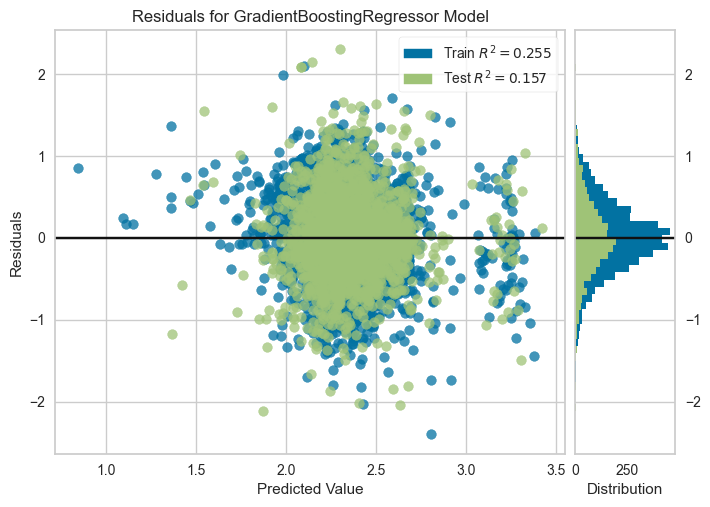

In [5]:
plot_model(best, plot = 'residuals')

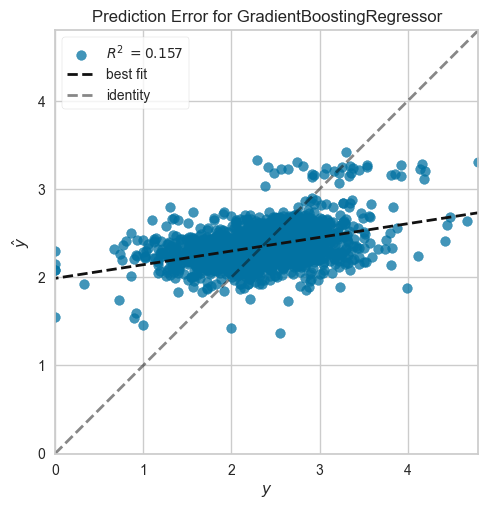

In [6]:
plot_model(best, plot='error')

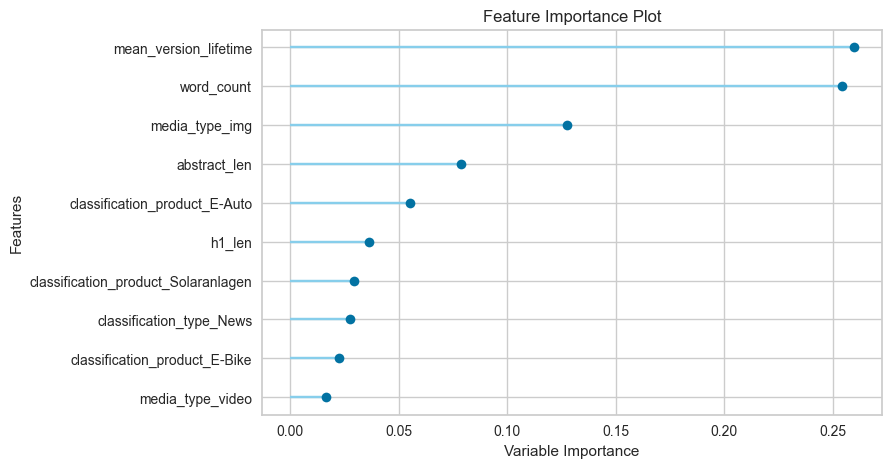

In [7]:
plot_model(best, plot = 'feature')

In [8]:
save_experiment('../models/bl_experiment_ctr.pkl')

In [9]:
save_model(model=best, model_name='../models/bl_ctr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['word_count', 'h1_len',
                                              'abstract_len',
                                              'mean_version_lifetime'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  Transfo...
                  TransformerWrapper(include=['classification_product',
                                              'classification_type',
                                              'media_type'],
                                     transformer=OneHotEncoder(cols=['classification_product',
                                                                     'classification_type',
                   